In [1]:
import numpy as np, random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import collections

&bull; Wirte a code for structuring the data so that the library routine can find the maximal-margin solution.<br>
&bull; The location of the decesion boundary is given by the weights (w) and the bias (b).<br>
&bull; Find the values for w and b which maximizes the margin (distance to any datapoint).
<img src="equations/optimize.png">

&bull; &uarr; C value will result in &darr; Slack, which will result in narrower margin

&bull; If you have noisy data -> use low C value to allow for more slack

# Variables:

In [22]:
C = 2
upper = False # upper boundary for bounds
threshold = 10**-5 # zero threshold
kernelType = 'pol' # type of kernel (lin,pol,RBF)
np.random.seed(100)
pointsN=40 # number of data points
SD = 0.2 #standard Deviation in the data
#kernel settings
pol = 4 #polynomial degree
sigma = 4 #smoothness of curve in RBF kernel

&bull; The objective equation (dual formulation)
<img src="equations/objective.png">

&bull; The optimization problem can be transformed into a different form, called the dual problem, which has some computational advantages.<br>
&bull; It makes it possible to use the kernel trick, which eleminates the need for evualuating the transformation function.

In [3]:
def objective (alpha):
    return 0.5*np.dot(alpha,np.dot(alpha,pre_compute)) - np.sum(alpha)

the Kernel equations:
<img src="equations/linearK.png">
<img src="equations/polynomialK.png">
<img src="equations/RBFK.png">

In [4]:
def kernel(a,b,pol,sigma):
    if kernelType == 'lin':
        return np.dot(a,b)
    
    elif kernelType == 'pol':
        return (np.dot(a,b) + 1)**pol
    
    elif kernelType == 'RBF':
        return math.exp(-np.linalg.norm(np.subtract(a,b),ord=2)/(2*sigma**2))
    else:
        raise Exception("Kernel not found")

Lagrange multiplier constraints:
<img src="equations/constraint.png">

In [5]:
def zerofun (alpha):
    
    return np.dot(alpha,targets)

bias (b) Value:
<img src="equations/b.png">

In [6]:
def b_calculator(non_zero):
    b = 0
    for current in non_zero:
        b += current['alpha']*current['t']*kernel(non_zero[2]['in'],current['in'],pol,sigma)
    return b - non_zero[2]['t']

indicator equation:
<img src="equations/indicator.png">

In [7]:
def indicator(non_zero,unkown,b):
    ind = 0
    for current in non_zero:
        ind += current['alpha']*current['t']*kernel(unkown,current['in'],pol,sigma)
    return ind - b

In [8]:
classA = np.concatenate((np.random.randn(int(pointsN/2),2)*SD+[1.5,0.5],
                        np.random.rand(int(pointsN/2),2)*SD+[-1.5,0.5]))
classB = np.random.randn(pointsN,2)*SD+[0.0,-0.5]

inputs = np.concatenate ((classA,classB))
targets = np.concatenate (
(np.ones(classA.shape[0]),
-np.ones(classB.shape[0])))

N = inputs.shape[0]

permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets [permute]

In [23]:
pre_compute = np.zeros(shape=(N,N))
for i in range(N):
    for j in range(N):
        pre_compute[i][j]=targets[i]*targets[j]*kernel(inputs[i],inputs[j],pol,sigma)

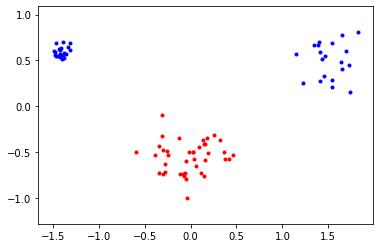

In [24]:
plt.plot([p[0] for p in classA],
        [p[1] for p in classA],
        'b.')
plt.plot([p[0] for p in classB],
        [p[1] for p in classB],
        'r.')

plt.axis('equal')
plt.savefig('svmplot.pdf')
plt.show()

In [25]:
initial_guess = np.zeros(N)


if upper:
    B= [(0,C) for b in range(N)]
else:
    B= [(0,None) for b in range(N)]

XC = {'type':'eq','fun':zerofun}

ret = minimize(objective,initial_guess,bounds=B,constraints=XC)

alpha = ret['x']
print ("zero_function result: ", np.dot(alpha,targets))
print(ret)

zero_function result:  1.3551659794330817e-13
     fun: -0.07219084096074102
     jac: array([ 1.4398605 ,  1.86245344, -0.99066477, -0.97397688, -0.99175383,
        1.50838223,  1.19782249,  2.25969307, -0.9689492 , -0.86683245,
       -0.86669385,  2.52017134,  1.54701087,  4.2390855 , -0.87365033,
        1.29913574,  3.54251376, -0.89884243, -0.85071545, -0.90158741,
       -0.92055565, -0.84580073,  1.76812294, -0.84109685, -0.95033852,
       -0.91421866, -0.88686316, -0.90210467, -0.95553041, -0.89185663,
       -0.99881054,  3.20471622, -0.84688346, -1.0044717 , -0.93682843,
        1.62540959, -0.90157345, -0.95822966,  5.79327594,  1.16762578,
       -0.92614061,  1.0028043 ,  1.47524455,  1.38386936,  2.03376777,
        3.73540954, -0.83225315, -0.77337546,  2.13637906, -0.86521364,
        4.22431326,  1.1848193 , -0.94587753, -1.00371878,  3.53219706,
       -0.92951395, -0.93810804,  2.22189468,  1.07591637,  1.32437637,
       -0.93567947, -0.84672654,  1.46059944,  1.

In [26]:
non_zero = []
for i, a in enumerate(alpha):
    #print(a)
    if a > threshold:
        non_zero.append({'alpha':a,'in':inputs[i],'t':targets[i]})
non_zero

[{'alpha': 0.035086179934087455,
  'in': array([ 0.45973079, -0.53304191]),
  't': -1.0},
 {'alpha': 0.023095682243462326,
  'in': array([-1.30859748,  0.61959474]),
  't': 1.0},
 {'alpha': 0.037072870500002054,
  'in': array([-0.3081232 , -0.09065721]),
  't': -1.0},
 {'alpha': 0.04906336819063057,
  'in': array([1.22872019, 0.2535131 ]),
  't': 1.0}]

In [27]:
b = b_calculator(non_zero)

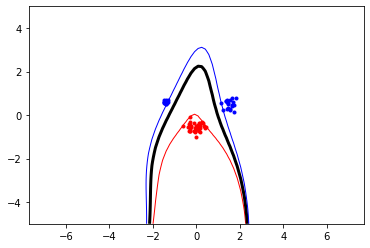

In [28]:
x_limits = 4
y_limits = 5
xgrid = np.linspace(-x_limits,x_limits)
ygrid = np.linspace(-y_limits,y_limits)

grid = np.array([[indicator(non_zero,[x,y],b)
                 for x in xgrid]
                for y in ygrid])
if ret['success']==True:
    plt.plot([p[0] for p in classA],
            [p[1] for p in classA],
            'b.')
    plt.plot([p[0] for p in classB],
            [p[1] for p in classB],
            'r.')

    plt.contour(xgrid,ygrid,grid,
               (-1.0,0.0,1.0),
               colors=('red','black','blue'),
               linewidths=(1,3,1))


    plt.axis('equal')
    plt.savefig('svmplot.pdf')
    plt.show()
else:
    print('Minimization failed succesfully')

# ASSIGNMENT QUESTIONS

<u><b>Question 1:</b></u> Move the clusters around and change their sizes to make it easier or harder for the classifier to find a decent boundary. Pay attention to when the optimizer (minimize function) is not able to find a solution at all. <br><br>
<b>Answer:</b> The optimizer was not able to find a solution once the standard deviation went over 0.6. The higher the standard deviation generated data that cannot be separated with a straight line. XC constraint is not equal to zero.
<img src="equations/SD.png">

<u><b>Question 2:</u></b> Implement the two non-linear kernels. You should be able to classify very hard data sets with these. <br><br>
<u><b>Answer:</u></b> <br>
Polynomial Kernel (400 datapoints,0.3SD)<img src="equations/pol-1.png">
RBF Kernel (40 datapoints,1.2SD)<img src="equations/RBF-1.png">

<u><b>Question 3:</u></b> The non-linear kernels have parameters; explore how they influence the decision boundary. Reason about this in terms of the bias- variance trade-off. <br><br>
<u><b>Answer:</u></b> <br>

&bull; polynomial degree - Polynomial Kernel:

The higher the degree, the more complex the polynomial. Bias decreases while Variance increases with higher degree polynomials.

<img src="equations/pol-2.png">
<img src="equations/pol-3.png">
<img src="equations/pol-4.png">

&bull; Sigma - RBF Kernel:

The curve smoothness increases with higher sigma values. This causes the curve to get straighter. With a straighter curve, the Bias increases, and the Variance decreases.
<img src="equations/RBF-2.png">
<img src="equations/RBF-3.png">
<img src="equations/RBF-4.png">

<u><b>Question 4:</u></b> Explore the role of the slack parameter C. What happens for very large/small values?<br><br>
<u><b>Answer:</u></b> <br>
&bull; the C parameter sets the upper boundary on the alpha values. Lower C value allows for points to be within the margin. (see fig, C=2)<br>
&bull; &uarr; C value will result in &darr; Slack, which will result in narrower margin.<br>
&bull; If you have noisy data -> use low C value to allow for more slack.
<img src="equations/C-1.png">

<u><b>Question 5:</u></b> Imagine that you are given data that is not easily separable. When should you opt for more slack rather than going for a more complex model (kernel) and vice versa?<br><br>
<u><b>Answer:</u></b> <br>

If the data is complex because of the presnece of outliers, then its best to use more slack. If the data has a higher standard deviation (more spread out), or impossible to classify with a straight line, then it is more relevant to use a complex kernel.